## LetsGrowMore - Advanced Level Task - 1

#### Task Description Given

Begin your neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners. Dataset can be seen on MNIST or can find here. 

Dataset Link Provided - https://en.wikipedia.org/wiki/MNIST_database

### CNN (Convultional Neural Networks)

A convolutional neural network (CNN) is a type of artificial neural network used in image recognition and processing that is specifically designed to process pixel data. This Deep Learning algorithm can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. 

### 1) Importing The Required Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

### 2) Importing The Dataset

In [3]:
dataset = keras.datasets.mnist

In [4]:
dataset

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\hp\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

### 3) Splitting The Dataset Into Train & Test Sets

In [5]:
(x_train, y_train), (x_test, y_test) = dataset.load_data()

### 4) Analysing The Dataset 

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

### 5) Visualizing The Trainset

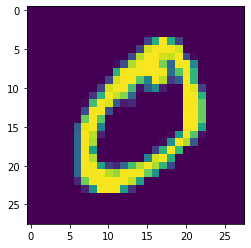

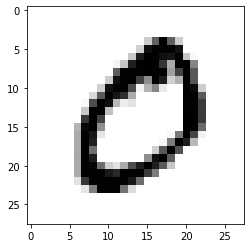

In [10]:
plt.imshow(x_train[1])
plt.show()
plt.imshow(x_train[1], cmap = plt.cm.binary)
plt.show()

### 6) Data Preprocessing

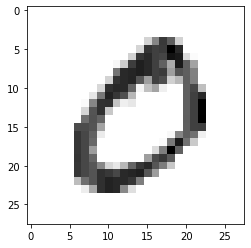

In [11]:
x_train = keras.utils.normalize(x_train, axis = 1)
x_test = keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[1], cmap = plt.cm.binary)
plt.show()

In [12]:
x_train = np.array(x_train).reshape(-1, 28, 28, 1)
print("Dimension Of Trainset:", x_train.shape)
x_test = np.array(x_test).reshape(-1, 28, 28, 1)
print("Dimension Of Testset:", x_test.shape)

Dimension Of Trainset: (60000, 28, 28, 1)
Dimension Of Testset: (10000, 28, 28, 1)


### 7) Creating CNN Model

In [13]:
model = Sequential()

model.add(Conv2D(64,(3,3), input_shape = x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [15]:
len(x_train)

60000

In [16]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])

In [17]:
model.fit(x_train, y_train, epochs = 3, validation_split  = 0.3, batch_size = 1)

Epoch 1/3
42000/42000 [==============================] - 160s 4ms/step - loss: 0.2326 - accuracy: 0.9311 - val_loss: 0.1075 - val_accuracy: 0.9704
Epoch 2/3
42000/42000 [==============================] - 168s 4ms/step - loss: 0.1263 - accuracy: 0.9661 - val_loss: 0.1157 - val_accuracy: 0.9709
Epoch 3/3
42000/42000 [==============================] - 160s 4ms/step - loss: 0.1074 - accuracy: 0.9721 - val_loss: 0.1555 - val_accuracy: 0.9713


### 8) Evaluating The Model

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuarcy On Samples:", test_acc)
print("Test Loss On Samples:", test_loss)

313/313 [==============================] - 3s 8ms/step - loss: 0.1428 - accuracy: 0.9740
Test Accuarcy On Samples: 0.9739999771118164
Test Loss On Samples: 0.14276579022407532


### 9) Testing The Model With A Custom Image

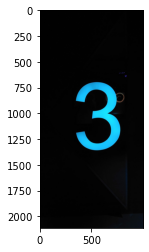

In [51]:
image = cv2.imread('myimage.jpg')
plt.imshow(image)
plt.show()

In [52]:
image = cv2.resize((cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)), (28,28), interpolation = cv2.INTER_AREA)

In [53]:
image.shape

(28, 28)

In [54]:
image = keras.utils.normalize(image, axis = 1)

In [55]:
image = np.array(image).reshape(-1, 28, 28, 1)

In [56]:
image.shape

(1, 28, 28, 1)

In [57]:
print("Number predicted from the image: ")
print(np.argmax(model.predict(image)))

Number predicted from the image: 
3


### CONCLUSION

Using CNN Deep Learning Model, we were able to predict the number in the image exactly.